# House-Sales Prediction


 In this project, we have taken the **kc_house** data from **Kaggle.com**. This dataset contains 21 columns and 21613 rows in which each row has  the id number of the  house, its price and various other features about the house like number of bedrooms, number of bathroom, number of floors and much more.
 
We will be building a deep neural network which will predict the price of the houses using regression. More specifically, we will be building the deep and wide neural network using tensorflow's **Functional API**.

We will also use the **feature columns** of Tensorflow to make some new complex features.

The wide network will contain only **one hidden layer** which can be though of as having a linear relationship with the output i.e. price of the house.

The deep network will use the continuous features which have a complex relationship with the output.

After making the deep and wide network, we will **concatenate** them and add another hidden layer followed by the output layer.

To evaluate the performance of the regression neural network, we wil use the **root mean squared error**.


## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import feature_column as fc

## Importing the dataset

In [2]:
df = pd.read_csv('kc_house_data.csv')

## Looking at the data 

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Checking for Null Values

In [6]:
null_columns = [features for features in df.columns if df[features].isnull().sum() > 0]

In [7]:
len(null_columns)

0

We can see that the dataset has no null-values

## Exploratory Data Analysis

In this Section, we will be analysing the correlation heatmap to find any highly correlated features. 

We will create some bar charts by grouping discrete value features and see the mean price of each value.

We will also create some scatter plot to analyse the price trends with continuous value features

<AxesSubplot:>

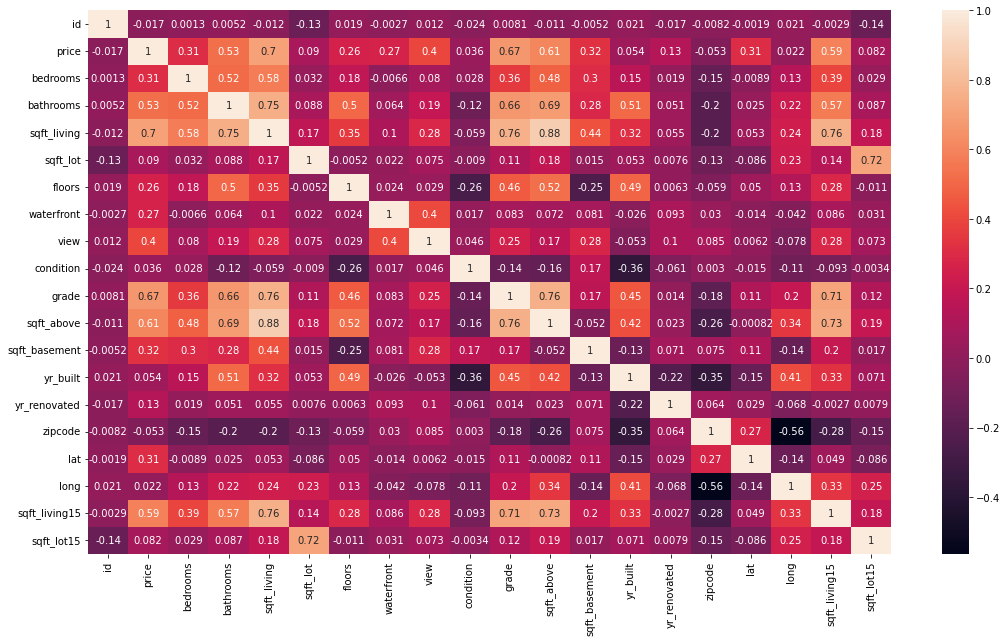

In [8]:
# Finding the correlation between the features
corr = df.corr()
plt.figure(figsize = (18,10))
sns.heatmap(corr , annot = True)

1) **Price** is highly correlated with bedrooms, **sqft_living**, **grade** and **sqft_living_15**

2) **sqft_living** is highly correlated with **sqft_above**.

3) **grade** is highly correlated with **sqft_above**

Text(0, 0.5, 'Mean-Price')

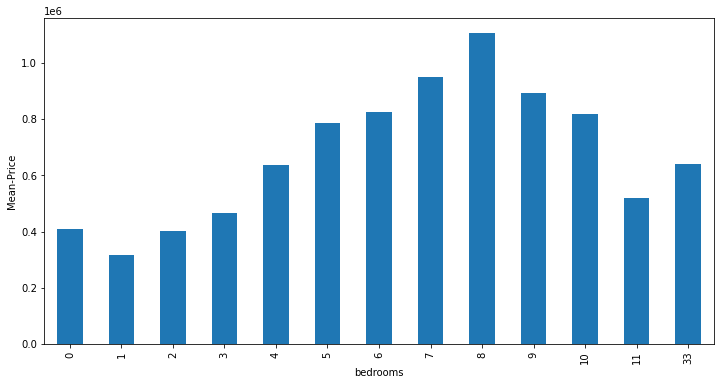

In [9]:
# A bar graph which shows the mean-price of houses wrt number of bedrooms.
plt.figure(figsize = (12,6))
df.groupby(by = 'bedrooms')['price'].mean().plot.bar()
plt.ylabel('Mean-Price')

`We can see that the price of house increases with the increase in the number of bedrooms but after 8 bedrooms, price starts to decrease. Also, there are houses with zero bedrooms`

Text(0, 0.5, 'Mean-Price')

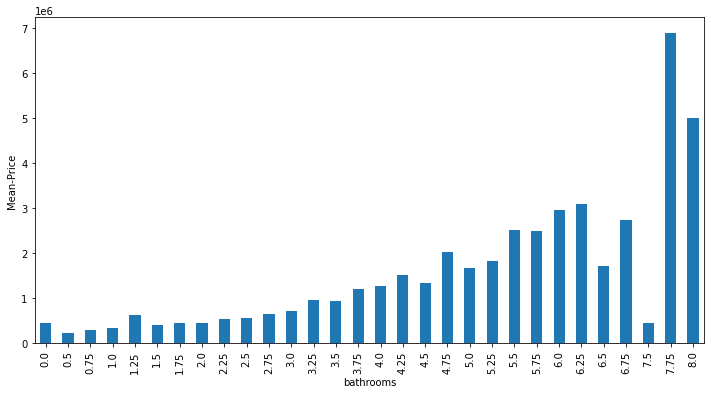

In [10]:
# A bar graph which shows the mean-price of houses wrt number of bathrooms.
plt.figure(figsize = (12,6))
df.groupby(by = 'bathrooms')['price'].mean().plot.bar()
plt.ylabel('Mean-Price')

`Price is increasing with the increase in the number of bathrooms. Also, there are houses with ZERO bathrooms`

Text(0, 0.5, 'Mean-Price')

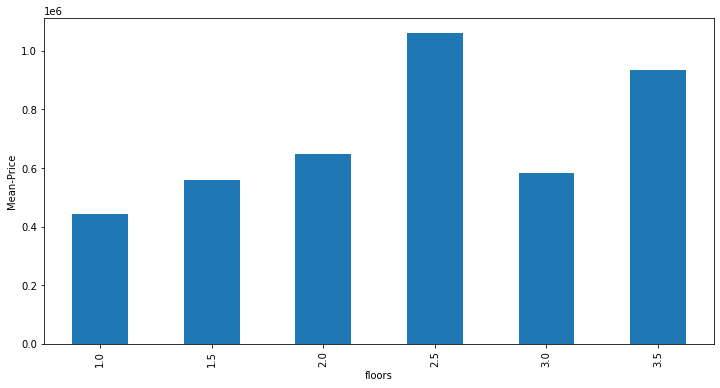

In [11]:
# A bar graph which shows the mean-price of houses wrt number of floors.
plt.figure(figsize = (12,6))
df.groupby(by = 'floors')['price'].mean().plot.bar()
plt.ylabel('Mean-Price')

`Price is increasing with increase in the number of floors`

Text(0, 0.5, 'Mean-Price')

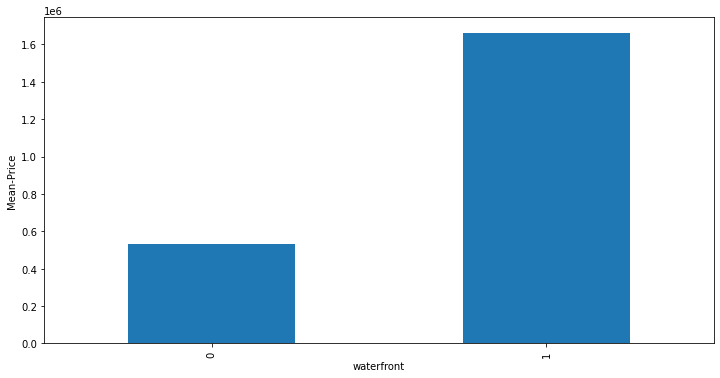

In [12]:
# A bar graph which shows the mean-price of houses if there is a waterfront or not.
plt.figure(figsize = (12,6))
df.groupby(by = 'waterfront')['price'].mean().plot.bar()
plt.ylabel('Mean-Price')

`Houses with waterfront have higher mean Price`

Text(0, 0.5, 'Mean-Price')

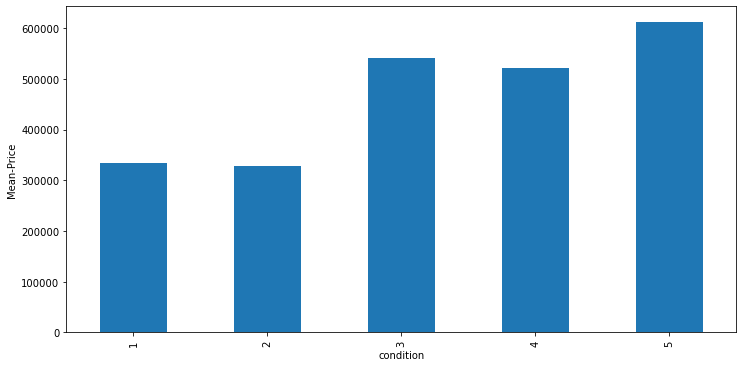

In [13]:
# A bar graph which shows the mean-price of houses wrt the condition of the house.
plt.figure(figsize = (12,6))
df.groupby(by = 'condition')['price'].mean().plot.bar()
plt.ylabel('Mean-Price')

`Price is increasing with increase in the condition of the house`

Text(0, 0.5, 'Mean-Price')

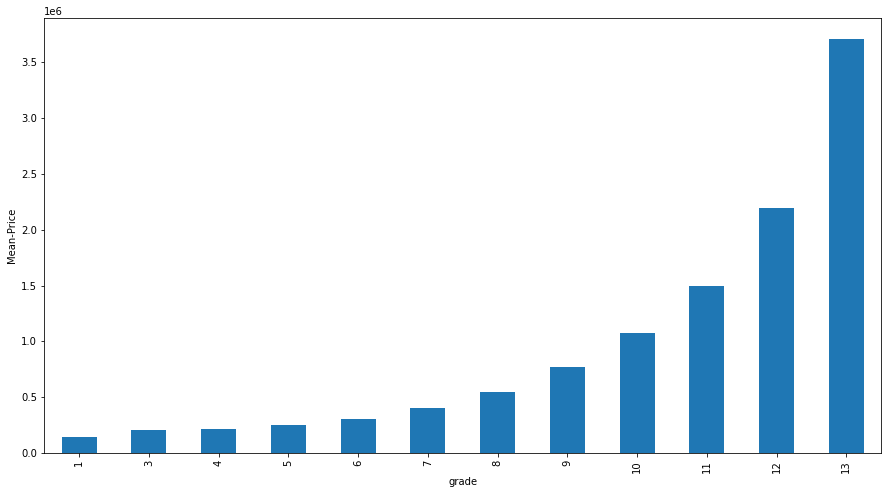

In [14]:
# A bar graph which shows the mean-price of houses wrt grade.
plt.figure(figsize = (15,8))
df.groupby(by = 'grade')['price'].mean().plot.bar()
plt.ylabel('Mean-Price')

`We can see that the Price of a house is increasing exponentially with increase in the grade`

Text(0.5, 0, 'sqft_living')

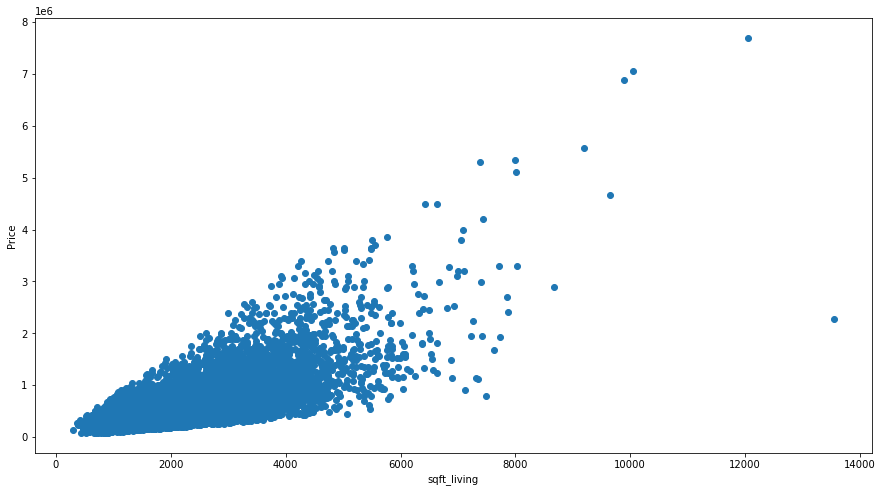

In [15]:
# scatter plot between sqft_living and price.
plt.figure(figsize = (15,8))
plt.scatter(df['sqft_living'] , df['price'])
plt.ylabel('Price')
plt.xlabel('sqft_living')

`Increase in sqft_living tends to increase the price of the house`

Text(0.5, 0, 'sqft_lot')

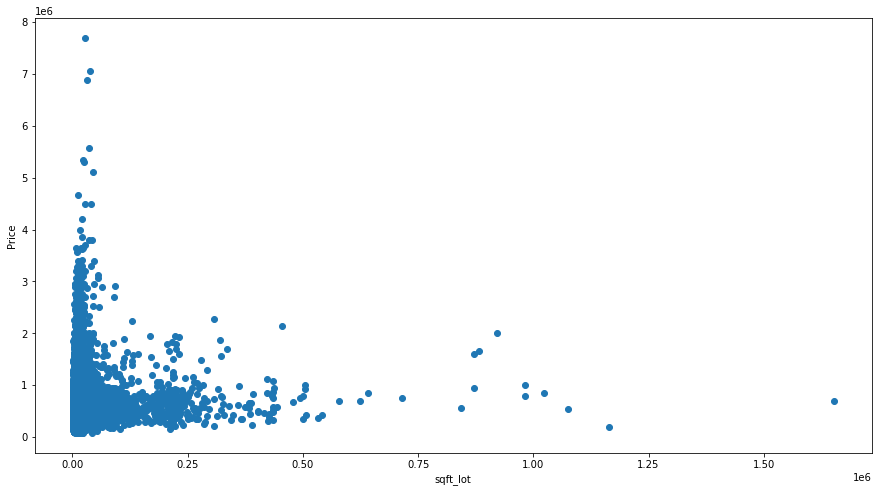

In [16]:
# scatter plot between sqft_lot and price.
plt.figure(figsize = (15,8))
plt.scatter(df['sqft_lot'] , df['price'])
plt.ylabel('Price')
plt.xlabel('sqft_lot')

`No clear trend can be seen in this plot. Some houses with less sqft_lot have high price and some with more sqft_lot also have high price`

Text(0.5, 0, 'sqft_living15')

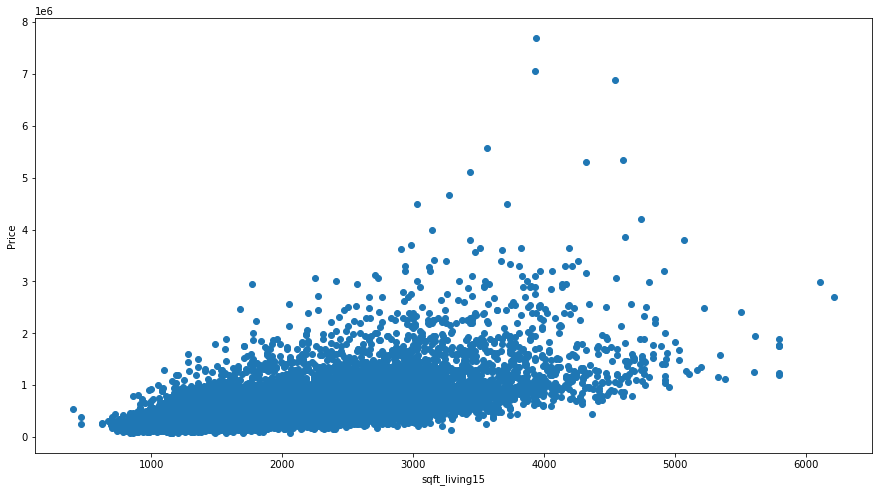

In [17]:
# scatter plot between sqft_living15 and price.
plt.figure(figsize = (15,8))
plt.scatter(df['sqft_living15'] , df['price'])
plt.ylabel('Price')
plt.xlabel('sqft_living15')

`Price is slowly increasing with increase in sqft_living15`

Text(0.5, 0, 'sqft_lot15')

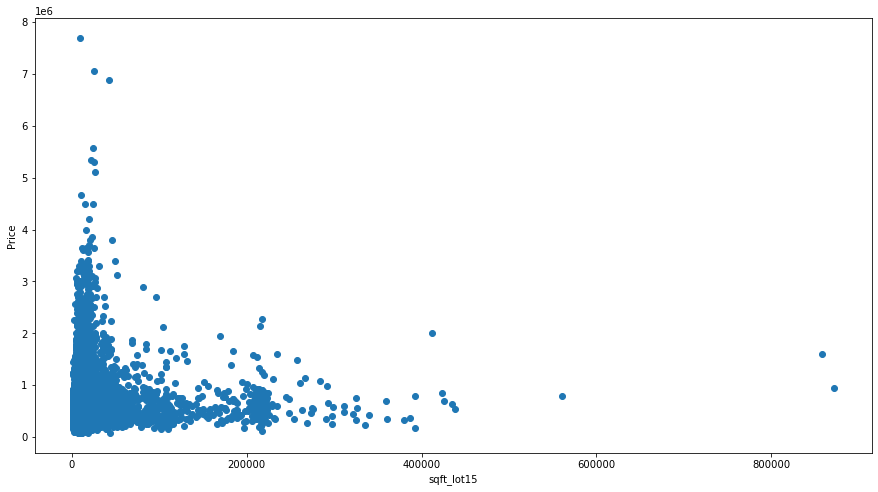

In [18]:
# scatter plot between sqft_lot15 and price.
plt.figure(figsize = (15,8))
plt.scatter(df['sqft_lot15'] , df['price'])
plt.ylabel('Price')
plt.xlabel('sqft_lot15')

`No clear trend can be observed in the above plot`

Text(0.5, 0, 'sqft_above')

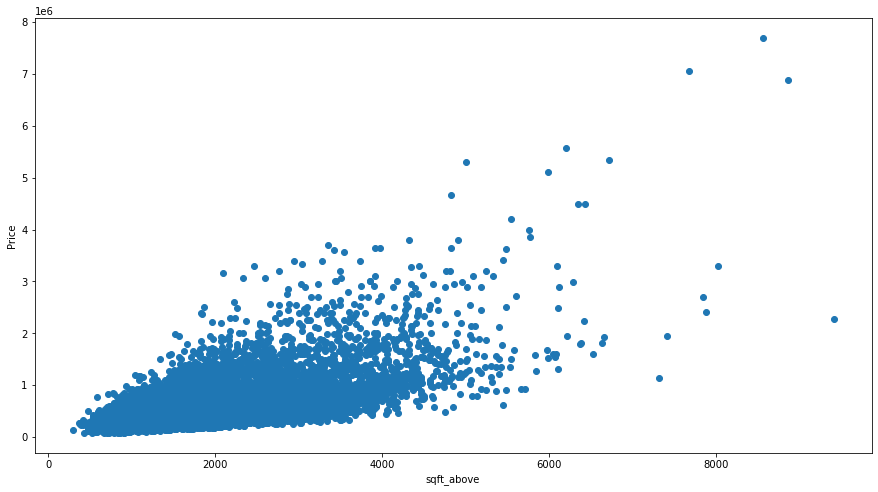

In [19]:
# scatter plot between sqft_above and price.
plt.figure(figsize = (15,8))
plt.scatter(df['sqft_above'] , df['price'])
plt.ylabel('Price')
plt.xlabel('sqft_above')

`We can see that with increase in sqft_above, the price of the houses also tend to increase`

Text(0.5, 0, 'sqft_basement')

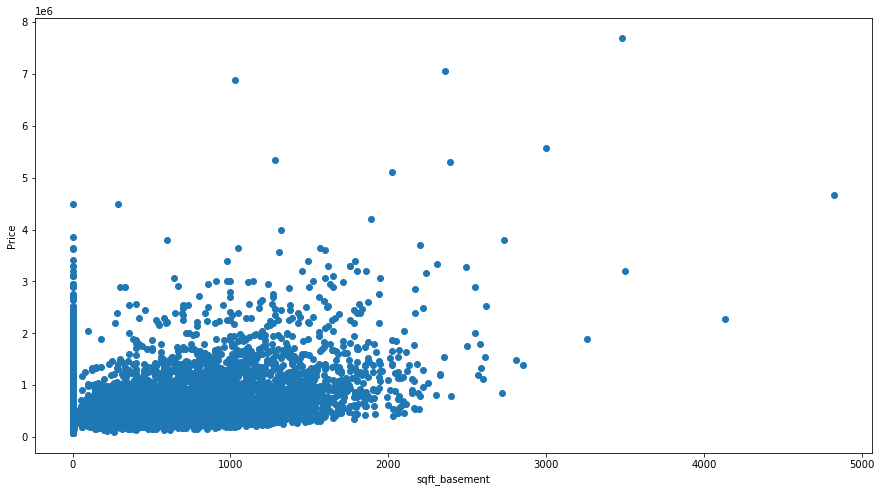

In [20]:
# scatter plot between sqft_above and price.
plt.figure(figsize = (15,8))
plt.scatter(df['sqft_basement'] , df['price'])
plt.ylabel('Price')
plt.xlabel('sqft_basement')

`No clear trend can be seen from this plot. Some houses with more sqft_lot15 have high price and some with low sqft_living15 also have high price`

Text(0.5, 0, 'yr_built')

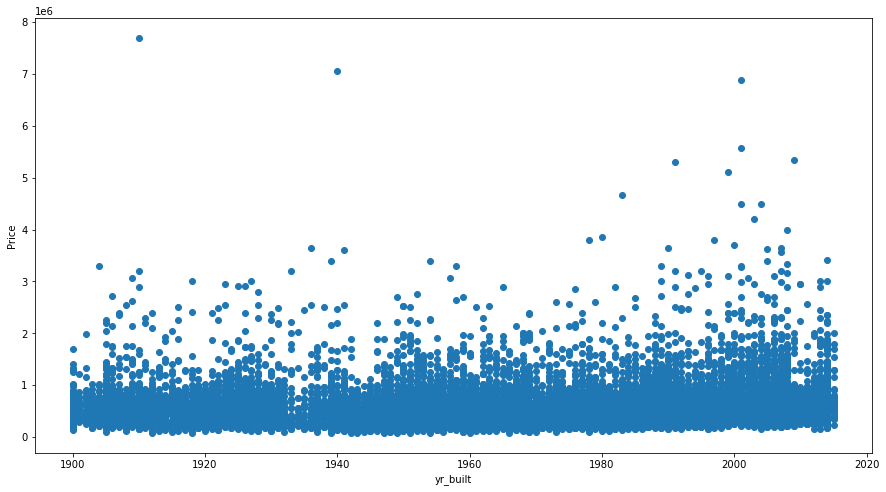

In [21]:
# scatter plot between yr_built and price.
plt.figure(figsize = (15,8))
plt.scatter(df['yr_built'] , df['price'])
plt.ylabel('Price')
plt.xlabel('yr_built')

`We can see that price of houses are higher for houses build in the past 30-40 years`

Text(0.5, 0, 'yr_renovated')

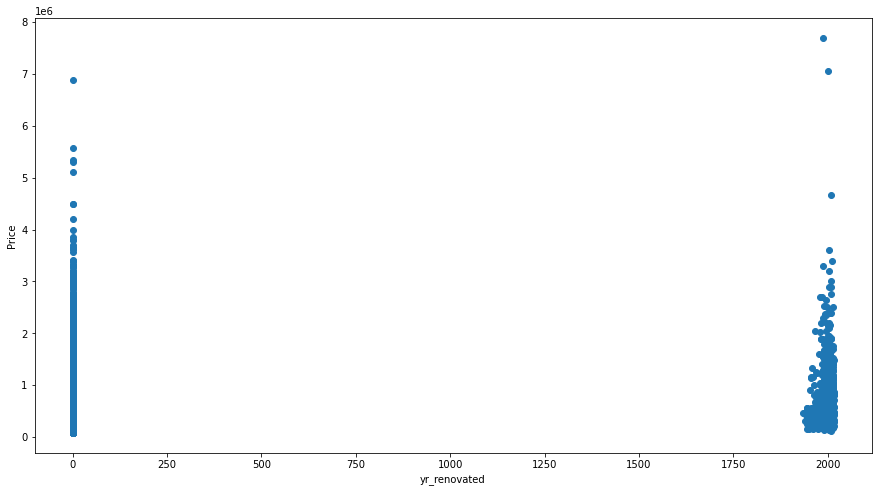

In [22]:
# scatter plot between yr_renovated and price.
plt.figure(figsize = (15,8))
plt.scatter(df['yr_renovated'] , df['price'])
plt.ylabel('Price')
plt.xlabel('yr_renovated')

`We can see that most houses have been renovated in the past 40-50 years with houses which were recently renovated selling for high price. Some houses have the value of yr_renovated as zero which implies that the house has not been renovated`

## Data Preprocessing 1 

Firstly, we'll remove the **'id'** column

In [23]:
df.drop('id' , axis = 1 , inplace = True)

The **date** column tells us about when the house went up for sale. So from this column, we'll parse out the **day**,**month** and **year** and then drop the **date** column 

In [24]:
year = []
month = []
day = []
for i in df.index:
    year.append(df['date'].iloc[i][:4])
    month.append(df['date'].iloc[i][4:6])
    day.append(df['date'].iloc[i][6:8])
df['year'] = year
df['year'] = pd.to_numeric(df['year'])
df['month'] = month
df['month'] = pd.to_numeric(df['month'])
df['day'] = day
df['day'] = pd.to_numeric(df['day'])
df.drop('date',axis = 1, inplace = True)

Text(0, 0.5, 'Mean-Price')

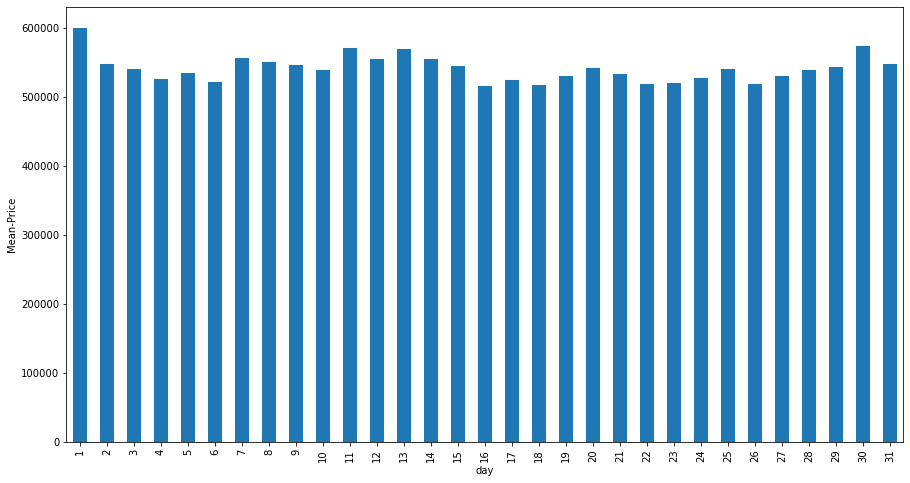

In [25]:
# A bar graph which shows the mean price of houses for the day on which they were put on sale.
plt.figure(figsize = (15,8))
df.groupby(by = 'day')['price'].mean().plot.bar()
plt.ylabel('Mean-Price')

`We cannot see any clear trend from the above plot.`

Text(0, 0.5, 'Mean-Price')

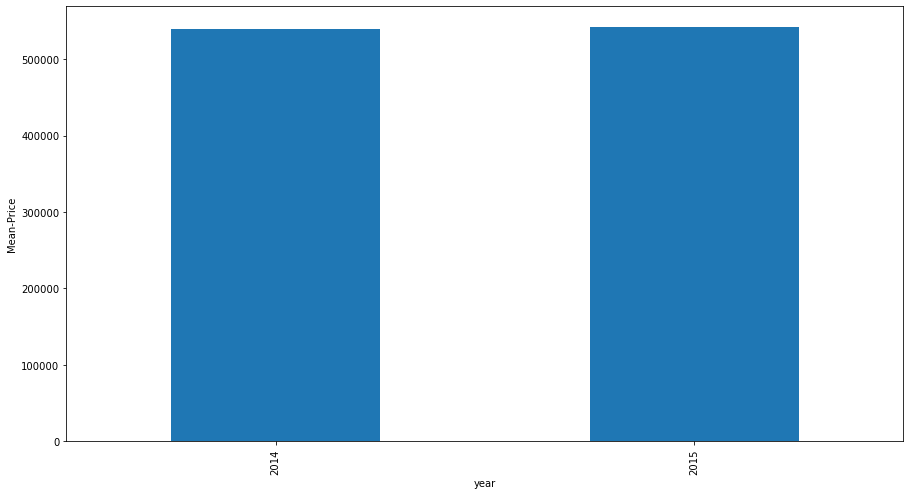

In [26]:
# A bar graph which shows the mean price of houses for the year in which they were put on sale.
plt.figure(figsize = (15,8))
df.groupby(by = 'year')['price'].mean().plot.bar()
plt.ylabel('Mean-Price')

`We cannot see any clear pattern from the above plot.`

Text(0, 0.5, 'Mean-Price')

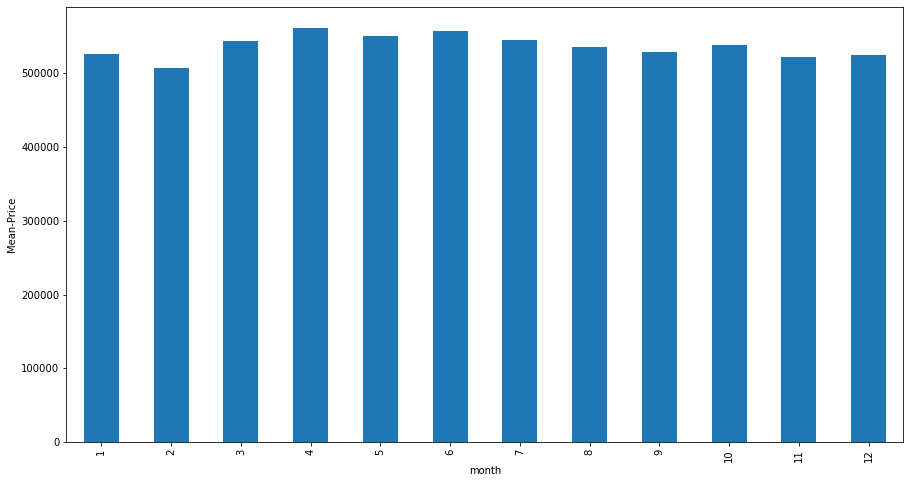

In [27]:
# A bar graph which shows the mean price of houses for the month in which they were put on sale.
plt.figure(figsize = (15,8))
df.groupby(by = 'month')['price'].mean().plot.bar()
plt.ylabel('Mean-Price')

`We cannot see any clear trend from the above plot.`

## Data Preprocessing 2

From the **yr_renovated** column, we will make another column called **is_renovated** which will have value **1** if the house was renovated and **0** is not renovated. Also for houses which were not renovated, we'll replace the value of 0 from the **yr_renovated** column with the corresponding **yr_built** values.

After this we will drop the **yr_build** column.

In [28]:
df['is_renovated'] = np.where(df['yr_renovated'] == 0 , 0 ,1)

In [29]:
for i in df.index:
    if df.loc[i]['yr_renovated'] == 0:
        df.at[i,'yr_renovated'] = df.loc[i]['yr_built']

Text(0, 0.5, 'Mean-Price')

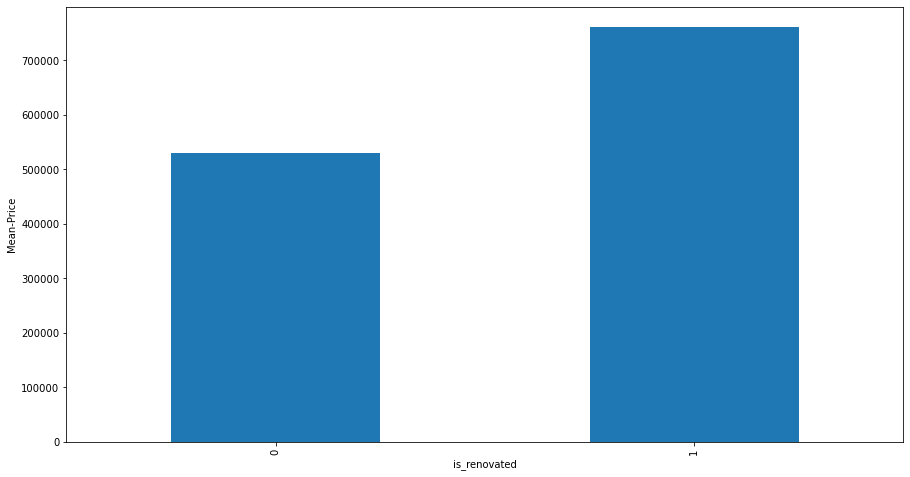

In [30]:
# A bar graph which shows the mean price of renovated houses and non-renovated houses
plt.figure(figsize = (15,8))
df.groupby(by = 'is_renovated')['price'].mean().plot.bar()
plt.ylabel('Mean-Price')

We can see that renovated houses have a higher average price

Text(0.5, 0, 'yr_renovated')

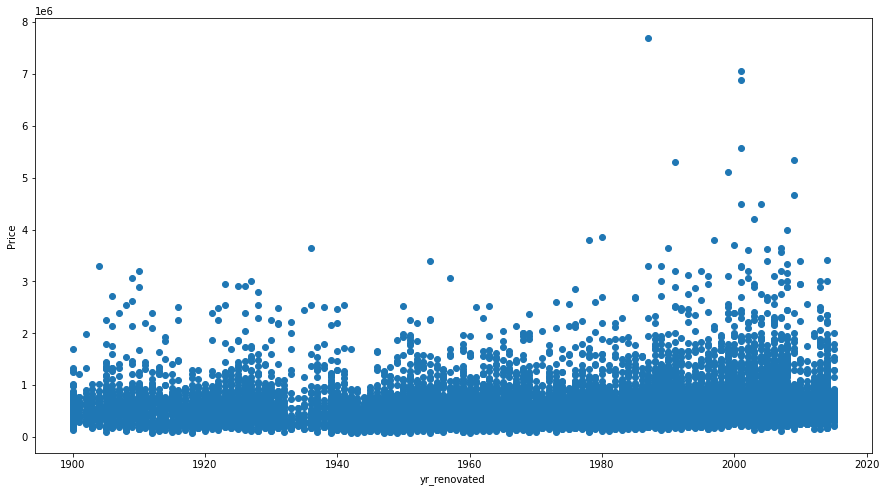

In [31]:
# scatter plot between yr_renovated and price.
plt.figure(figsize = (15,8))
plt.scatter(df['yr_renovated'] , df['price'])
plt.ylabel('Price')
plt.xlabel('yr_renovated')

## Splitting into training, validation and test data

Before splitting the data in training , validation and test data, we will first remove the columns which we found from the above Exploratory Data Analysis as having no impact on price.

These columns are **sqft_lot , sqft_lot15 , day, month, year,yr_build**

In [32]:
df.drop(['sqft_lot','sqft_lot15','year','month','day','yr_built'],axis = 1 , inplace = True)

In [33]:
train, test = train_test_split(df , test_size = 0.2)
train , val = train_test_split(train , test_size = 0.25)

## Creating an input pipeline which will give us data in batches

We will use the **.data.Dataset.from_tensor_slices** method of tensorflow such that the function defined below will return a dataset which will be segregated into features and the output label.

We will also **shuffle** the data if the shuffle argument of the **df_to_dataset** funtion is set to True. We will do this using the **.shuffle** method.

We will also **batch** our dataset using the **.batch** method using the specified batch_size

In [34]:
def df_to_dataset(dataframe , shuffle = True , batch_size = 128):
    dataset = dataframe.copy()
    label = dataset.pop('price')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataset) , label))
    if shuffle:
        ds = ds.shuffle(buffer_size = 256)
    ds = ds.batch(batch_size)
    return ds

Here, we will obtain the **training**, **validation** and **test** dataset using the function defined above.

Each dataset will be batched using the defined **batch_size** and will also be shuffled if the **shuffle argument is set to True**.
We will be shuffling only our **training dataset.**


In [35]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size = batch_size)
val_ds = df_to_dataset(val , shuffle = False)
test_df = df_to_dataset(test , shuffle = False)

## Using Feature Columns of the TensorFlow library

Now we will be using the **feature_column** to **modify** existing and use them to **create new features** for our **deep** and **wide** models

Instead of directly using the raw values of **lat, long, zipcode and yr_renovated,** we will use the **bucketized_column** feature of **feature_columns** to split the raw data into **several buckets.**

Firstly, for making buckets, we will find out the **maximum** and **minimum** values of each feature and then using the **.linspace** method of the numpy library, we will find out the **boundaries** for each bucket. 

In [36]:
bucketized_column = ['yr_renovated','zipcode','lat','long']
for cols in bucketized_column:
    print(cols + ": min :" + str(df[cols].min()))
    print(cols + ": max :" + str(df[cols].max()))
    print(cols + ": Number of unique values :" + str(len(df[cols].unique())))

yr_renovated: min :1900
yr_renovated: max :2015
yr_renovated: Number of unique values :116
zipcode: min :98001
zipcode: max :98199
zipcode: Number of unique values :70
lat: min :47.1559
lat: max :47.7776
lat: Number of unique values :5034
long: min :-122.519
long: max :-121.315
long: Number of unique values :752


In [37]:
# We will yr_renovated into 10 buckets

In [38]:
# Bucket_size_yr_renovated is (the number of buckets that we want yr_renovated to split into - 1) as n values 
# will generate n+1 buckets
Bucket_size_yr_renovated = 9
# This will generate a list of 9 equally spaced numbers between 1900 and 2015 which will act as the boundaries for our buckets
yr_renovated_buckets = np.linspace(start = 1900 , stop = 2015 , num = Bucket_size_yr_renovated).tolist()
# This will give us yr_renovated but in bucketized form.First we will convert 'yr_renovated' to a numeric column 
# using the numeric_column method of feature_column
bucketize_yr_renovated = fc.bucketized_column(source_column= fc.numeric_column('yr_renovated') , boundaries= yr_renovated_buckets) 

In [39]:
# We will divide lat into 300 buckets , long into 100 buckets and zipcode into 40 buckets

In [40]:
# Bucket_size_zipcode is (the number of buckets that we want zipcode to split into - 1) as n values 
# will generate n+1 buckets.
Bucket_size_zipcode = 39
# This will generate a list of 39 equally spaced numbers between 98001 and 98199 which will act as the boundaries for our buckets
zipcode_buckets = np.linspace(start = 98001 , stop = 98199 , num = Bucket_size_zipcode).tolist()
# This will give us zipcode but in bucketized form. First we will convert 'zipcode' to a numeric column using the numeric_column
# method of feature_column
bucketize_zipcode = fc.bucketized_column(source_column= fc.numeric_column('zipcode'), boundaries = zipcode_buckets)

In [41]:
# Bucket_lat is (the number of buckets that we want zipcode to split into - 1) as n values 
# will generate n+1 buckets.
Bucket_lat = 299
# This will generate a list of 99 equally spaced numbers between 47.1559 and 47.7775 which will act as 
# the boundaries for our buckets.
lat_buckets = np.linspace(start = 47.1559 , stop = 47.7776 , num = Bucket_lat).tolist()
# This will give us lat but in bucketized form.First we will convert 'lat' to a numeric column using the numeric_column
# method of feature_column
bucketize_lat = fc.bucketized_column(source_column = fc.numeric_column('lat'), boundaries = lat_buckets)

In [42]:
# Bucket_long is (the number of buckets that we want zipcode to split into - 1) as n values 
# will generate n+1 buckets.
Bucket_long = 99
# This will generate a list of 99 equally spaced numbers between -122.514 and -121.315 which will act as 
# the boundaries for our buckets.
long_buckets = np.linspace(start = -122.519 , stop = -121.315 , num = Bucket_long).tolist()
# This will give us long but in bucketized form.First we will convert 'long' to a numeric column using the numeric_column
# method of feature_column
bucketize_long = fc.bucketized_column(source_column = fc.numeric_column('long'), boundaries = long_buckets)

Now we know that the location of a house is defined by looking at the latitude and longitude together. So to combine latitudes and longitudes, we will use the **crossed_column feature** of feature_columns. The result will be same as doing One-Hot-Encoding where the value will be **1** in a particular column corresponding to the combination of a particular bucket of latitudes and longitudes and the rest of the columns will have value **zero**.

In [43]:
# Here hash_bucket_size is the number of columns that we want in our crossed_column feature. We can have this value as
# the multiplication of the number of bucktets of lat and long.
crossed_column_lat_long = fc.crossed_column([bucketize_lat,bucketize_long], hash_bucket_size= (Bucket_lat*Bucket_long))

As we can see that in the **crossed_column_lat_long**, we will have **99*99** columns. This can make the neural network **overfit** on our data. So to reduce the **dimentionality**, we will use the **embedding_column** of feature_column. In this we will have to pass an argument called **dimensions**. Then each column in crossed_column_lat_long will be represented by a **vector of dimensions = dimensions** and we will use this **embedding column** in our model

In [44]:
# We will use dimension = 10
embedding_lat_long = fc.embedding_column(categorical_column = crossed_column_lat_long , dimension= 10)

## Preparing the model 

We will be using a **wide and deep** neural network model to train on our **training data**. 

In [45]:
# wide_columns will be used for the wide model. We will be using the crossed_lat_long only for the wide model
wide_columns =[
    fc.indicator_column(crossed_column_lat_long)
] 

In [46]:
# deep_columns will be used for the deep model. Here we will use all the numerical columns , embedding columns and some of 
# the bucketized columns  

In [47]:
deep_columns = [
        bucketize_yr_renovated,
        bucketize_zipcode,
        embedding_lat_long,
        fc.numeric_column('bedrooms'),
        fc.numeric_column('bathrooms'),
        fc.numeric_column('sqft_living'),
        fc.numeric_column('floors'),
        fc.numeric_column('waterfront'),
        fc.numeric_column('view'),
        fc.numeric_column('condition'),
        fc.numeric_column('grade'),
        fc.numeric_column('sqft_basement'),
        fc.numeric_column('yr_renovated'),
        fc.numeric_column('sqft_living15'),
        fc.numeric_column('is_renovated')
]

Now we will create inputs dictionary which will contain our columns as tensorflow tensors which we can use in our model

In [48]:
# First we will make a list of all the columns that we will be using

In [49]:
INPUT = ['bedrooms','bathrooms','sqft_living','floors','view','condition','grade','sqft_basement','sqft_living15','yr_renovated','is_renovated','waterfront','zipcode','lat','long']

In [50]:
inputs = {colname : layers.Input(name = colname , shape = () , dtype = tf.float32) for colname in INPUT}

To evaluate the of our model, we will be using the **root mean squared error**. So we will make a custom function to calculate the root mean squared error

In [51]:
def rmse(y_true,y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred-y_true)))

## Making the model 

We will make the **deep and wide models** separately and then concatenate them.

In [52]:
# deep represents the deep model
# DenseFeatures will make dense tensor based on the features of deep_columns
deep = layers.DenseFeatures(deep_columns, name = 'Deep_Columns')(inputs)
deep = layers.Dense(units = 512 , activation = 'relu', name = 'Deep_Layer_1' )(deep)
deep = layers.Dense(units = 256 , activation = 'relu', name = 'Deep_Layer_2')(deep)
deep = layers.Dropout(0.4,name = 'Deep_Dropout_Layer_1')(deep)
deep = layers.Dense(units = 128 , activation = 'relu', name = 'Deep_Layer_3')(deep)
deep = layers.Dropout(0.3,name = 'Deep_Dropout_Layer_2')(deep)
deep = layers.Dense(units = 64 , activation = 'relu', name = 'Deep_Layer_4')(deep)
deep = layers.Dropout(0.2,name = 'Deep_Dropout_Layer_3')(deep)
deep = layers.Dense(units = 32 , activation = 'relu', name = 'Deep_Layer_5')(deep)

# Now we will be making the wide model

wide = layers.DenseFeatures(wide_columns, name = 'Wide_Columns')(inputs)
wide = layers.Dense(units = 1 , activation = 'relu', name = 'Wide_Layer_1')(wide)

# Now we will merge the two models

merged = layers.concatenate(inputs = [deep,wide])

# Now we will add 1 hidden layer and one output layer in the combined model

merged = layers.Dense(units = 52 , activation = 'relu', name = "Merged_Layer_1")(merged)
output = layers.Dense(units = 1 , activation = 'linear', name = 'Output_Layer')(merged)

# keras.Model will group all the layers which can then be used for training

model = tf.keras.Model(inputs = list(inputs.values()),outputs = output)

# Now we will compile the model using .compile method. We will be using the 'adam' optimizer , loss_function will be the 
# mean_squared_error and the metrics will be the root_mean_squared error

model.compile(optimizer = 'adam' , loss = 'mse' , metrics = [rmse])

In [53]:
from tensorflow.keras.utils import plot_model

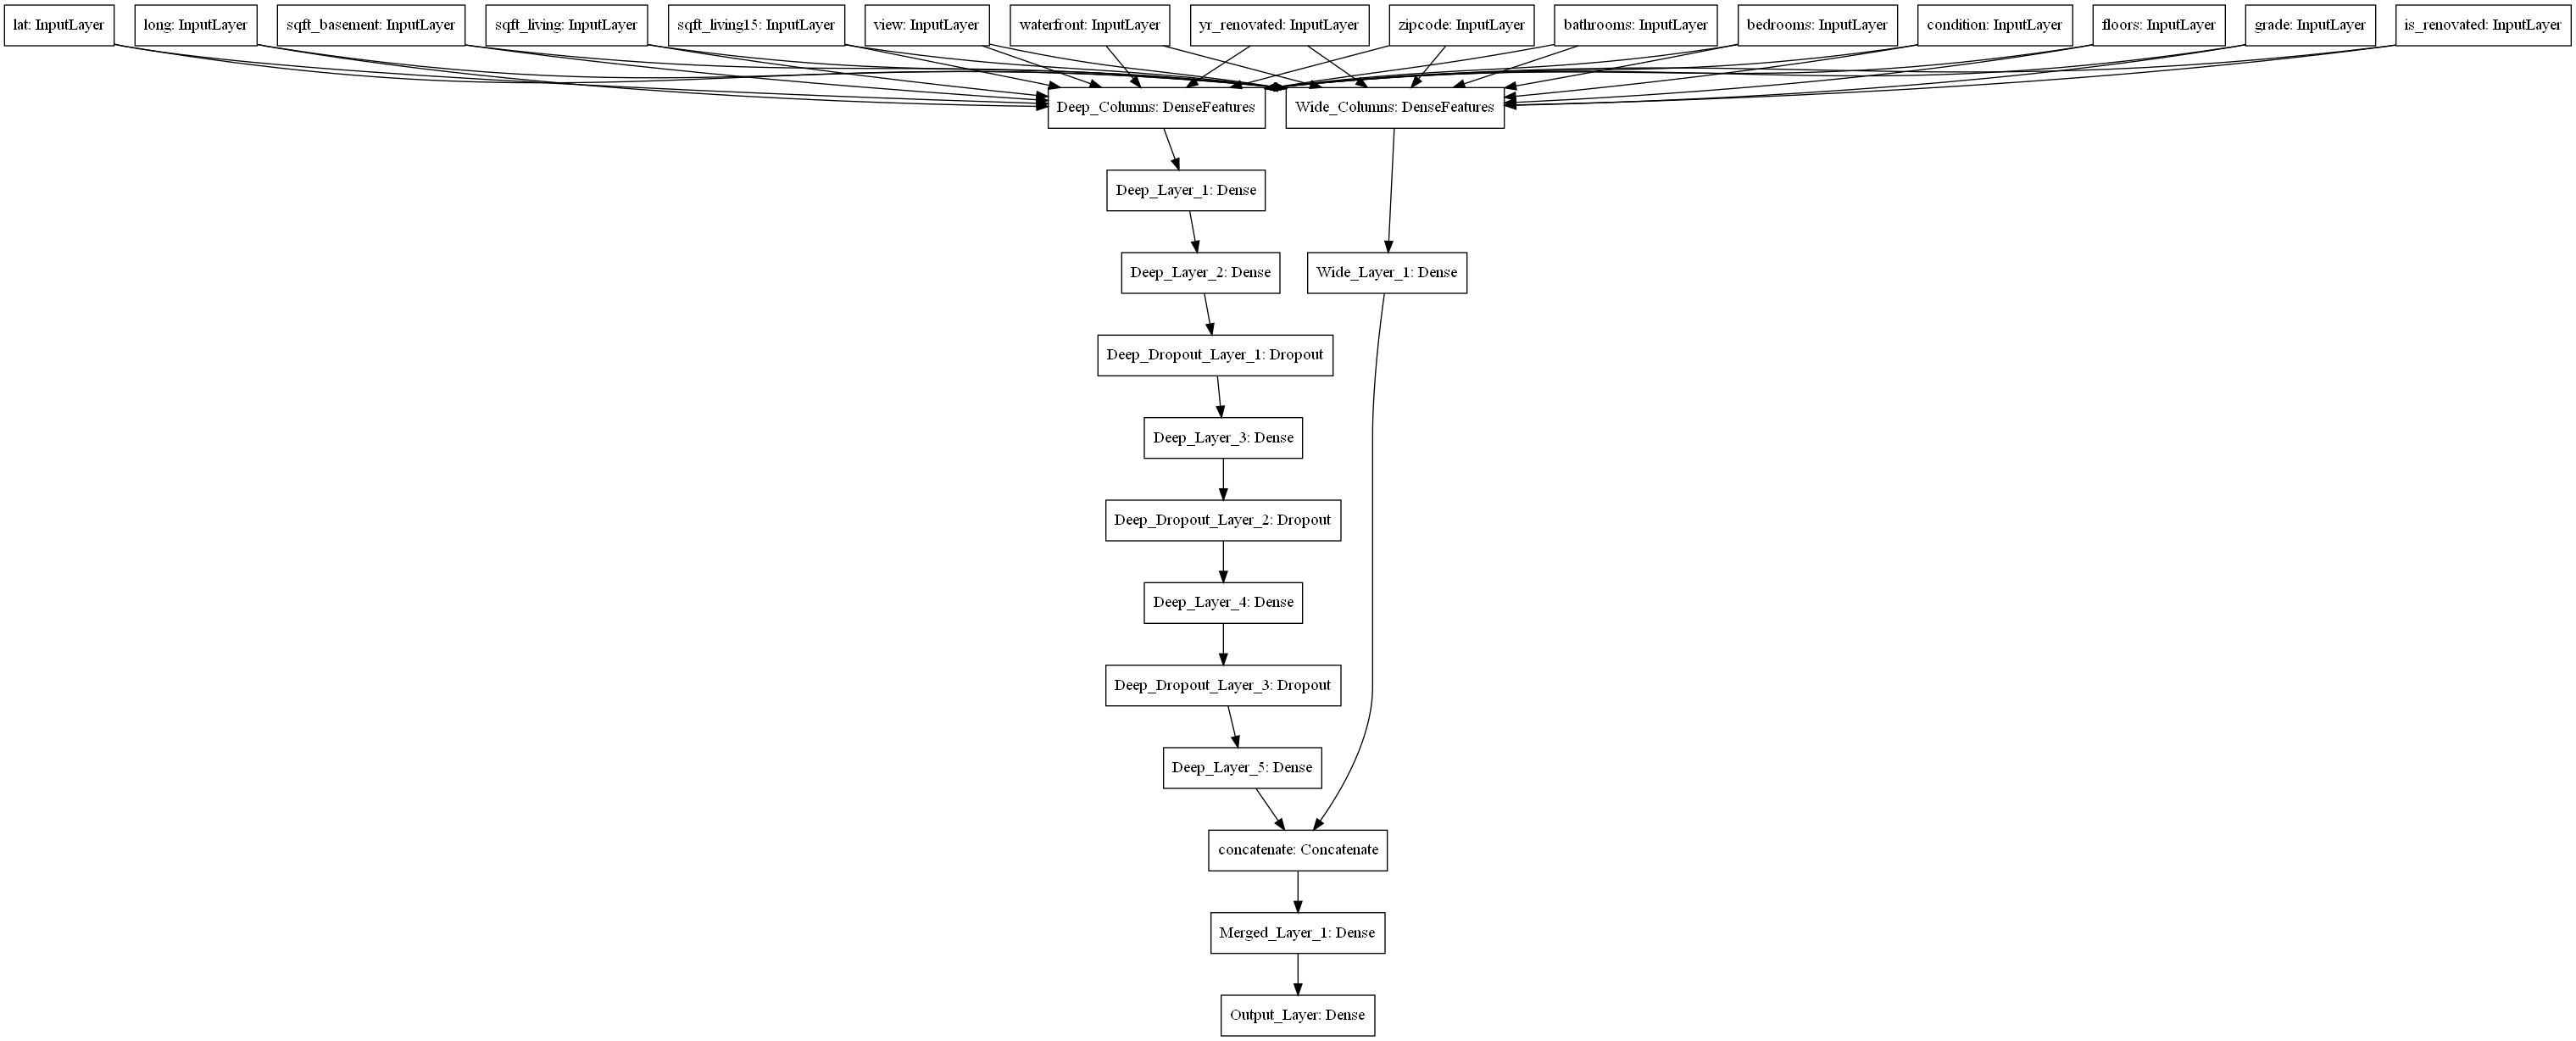

<Figure size 1440x720 with 0 Axes>

In [54]:
plt.figure(figsize = (20,10))
plot_model(model , show_shapes = False , rankdir = 'TB')

The above figure represents the entire neural network showing all the **connection** and the **hidden layers**

## Training the model on training and validation dataset 

In [55]:
history = model.fit(train_ds , validation_data = val_ds , epochs = 65)

Epoch 1/65


C:\Users\Me PC\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\engine\functional.py:588: UserWarning: Input dict contained keys ['sqft_above'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


51/51 [==============================] - 5s 50ms/step - loss: 277472247808.0000 - rmse: 502935.6562 - val_loss: 94052442112.0000 - val_rmse: 301370.6250
Epoch 2/65
51/51 [==============================] - 2s 32ms/step - loss: 85406416896.0000 - rmse: 287480.7812 - val_loss: 69939503104.0000 - val_rmse: 259933.9062
Epoch 3/65
51/51 [==============================] - 2s 33ms/step - loss: 76556238848.0000 - rmse: 273472.2188 - val_loss: 65212039168.0000 - val_rmse: 251546.4062
Epoch 4/65
51/51 [==============================] - 2s 32ms/step - loss: 73660080128.0000 - rmse: 267351.6562 - val_loss: 62608683008.0000 - val_rmse: 247075.9062
Epoch 5/65
51/51 [==============================] - 2s 33ms/step - loss: 69984788480.0000 - rmse: 261261.6875 - val_loss: 61436837888.0000 - val_rmse: 245244.9531
Epoch 6/65
51/51 [==============================] - 2s 32ms/step - loss: 68529803264.0000 - rmse: 259698.7031 - val_loss: 62006038528.0000 - val_rmse: 246188.9062
Epoch 7/65
51/51 [==============

51/51 [==============================] - 2s 32ms/step - loss: 22918768640.0000 - rmse: 148313.5312 - val_loss: 29915754496.0000 - val_rmse: 169005.2500
Epoch 52/65
51/51 [==============================] - 2s 32ms/step - loss: 25471811584.0000 - rmse: 154640.7969 - val_loss: 31353503744.0000 - val_rmse: 173425.8750
Epoch 53/65
51/51 [==============================] - 2s 32ms/step - loss: 19956846592.0000 - rmse: 139302.0938 - val_loss: 30902632448.0000 - val_rmse: 171318.8906
Epoch 54/65
51/51 [==============================] - 2s 32ms/step - loss: 20362002432.0000 - rmse: 139762.9062 - val_loss: 30696456192.0000 - val_rmse: 170829.7969
Epoch 55/65
51/51 [==============================] - 2s 36ms/step - loss: 24005099520.0000 - rmse: 151665.4531 - val_loss: 37655793664.0000 - val_rmse: 189589.0625
Epoch 56/65
51/51 [==============================] - 2s 32ms/step - loss: 19243038720.0000 - rmse: 136843.7344 - val_loss: 29859502080.0000 - val_rmse: 168528.0781
Epoch 57/65
51/51 [=========

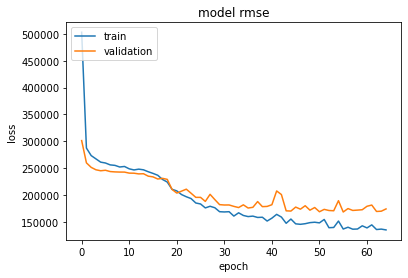

In [56]:
# plot which shows the loss of both the training and validation data vs the number of epochs
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('model rmse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Using the model to predict the test data 

In [57]:
y_pred = model.predict(test_df)

## Evaluating the predicted values using the RMSE function defined above 

In [58]:
## To feed in the predicted and know price data, first we need to reshape the y_pred to a 1-D numpy array.
y_pred = y_pred.reshape(len(y_pred))

In [59]:
y_true = test['price'].values

In [60]:
rmse(y_pred,y_true).numpy()

175117.0351913912

We can see that the root mean squared error value for the test set is about 175,117

If we calculate the percent error using the rmse value given above w.r.t to the mean price in the original data set, we get:
                                 
`% error = (175117/df['price'].mean())*100 = 32.42%`
                     
Hence, the error is  : **32.42%** 


This concluded this project. We build a regressor using the **deep and wide neural network** with the help of various features provided by the tensorflow library such as **feature columns** and **the functional API**.